# **Soil Moisture Prediction**
### ECE3502 - IoT Domain Analyst

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Dataset Inspection

In [5]:
d = pd.read_csv('Dataset.csv')

In [6]:
d.head()

,MoisturePercentage,Humidity,Heatcelcius
0,0.6491,0.617,35.1
1,0.6999,0.628,35.1
2,0.6999,0.631,35.1
3,0.7019,0.646,35.1
4,0.7009,0.648,35.1


In [7]:
d.describe() 

,MoisturePercentage,Humidity,Heatcelcius
count,93.000000,93.00000,93.000000
mean,0.560731,0.68272,34.973118
std,0.099847,0.04892,0.187744
min,0.450600,0.60100,34.600000
25%,0.477000,0.64400,34.800000
50%,0.530800,0.66200,35.000000
75%,0.639300,0.72000,35.100000
max,0.741900,0.79300,35.300000


In [8]:
d.shape 

(93, 3)

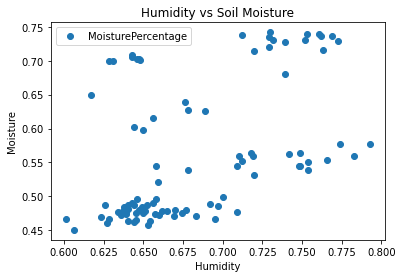

In [9]:
d.plot(x='Humidity', y='MoisturePercentage', style='o')  
plt.title('Humidity vs Soil Moisture')  
plt.xlabel('Humidity')  
plt.ylabel('Moisture')  
plt.show()  

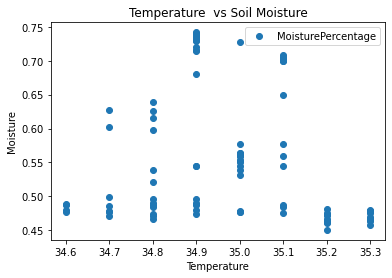

In [10]:
d.plot(x='Heatcelcius', y='MoisturePercentage', style='o')  
plt.title('Temperature  vs Soil Moisture')  
plt.xlabel('Temperature')  
plt.ylabel('Moisture')  
plt.show()

### Test-train Split

In [11]:
x = d.iloc[:, 1:3].values
y = d.iloc[:, 0].values

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1) 

In [15]:
s = StandardScaler()  
xtrain = s.fit_transform(xtrain)  
xtest = s.transform(xtest) 

In [16]:
df0 = pd.DataFrame({'Actual': ytest})

### Metrics

In [17]:
def evaluate(name,r,p,model):
    value = pd.DataFrame({'Model' : [name],
            'Mean Absolute Error' : metrics.mean_absolute_error(r,p),
            'Mean Squared Error' : metrics.mean_squared_error(r,p),
            'Root Mean Squared Error' : np.sqrt(metrics.mean_squared_error(r,p)),
            'Training Accuracy' : [model.score(xtrain, ytrain)*100],
            'Testing Accuracy' : [model.score(xtest, ytest)*100]})
    return value

### Random Forest Regression

In [18]:
model1 = RandomForestRegressor(n_estimators=15, random_state=42) 

In [19]:
model1.fit(xtrain, ytrain)
p1 = model1.predict(xtest)

In [20]:
df1 = pd.DataFrame({'Random Forest': p1})

In [21]:
a1 = evaluate("Random Forest",ytest,p1,model1)

### Linear Regression

In [22]:
model2 = LinearRegression()

In [23]:
model2.fit(xtrain, ytrain)
p2 = model2.predict(xtest)

In [24]:
df2 = pd.DataFrame({'Linear': p2})

In [25]:
a2 = evaluate("Linear",ytest,p2,model2)

### KNN Regression

In [26]:
model3 = KNeighborsRegressor()

In [27]:
model3.fit(xtrain, ytrain)
p3 = model3.predict(xtest)

In [28]:
df3 = pd.DataFrame({'KNN': p3})

In [29]:
a3 = evaluate("KNN",ytest,p3,model3)

### Decision Tree Regression

In [30]:
model4 = DecisionTreeRegressor()

In [31]:
model4.fit(xtrain, ytrain)
p4 = model4.predict(xtest)

In [32]:
df4 = pd.DataFrame({'Decision Tree': p4})

In [33]:
a4 = evaluate("Decision Tree",ytest,p4,model4)

### SVM Regression

In [34]:
model5 = SVR()

In [35]:
model5.fit(xtrain, ytrain)
p5 = model5.predict(xtest)

In [36]:
df5 = pd.DataFrame({'SVM': p5})

In [37]:
a5 = evaluate("SVM",ytest,p5,model5)

### Ridge

In [38]:
model6 = Ridge()

In [39]:
model6.fit(xtrain, ytrain)
p6 = model6.predict(xtest)

In [40]:
df6 = pd.DataFrame({'Ridge': p6})

In [41]:
a6 = evaluate("Ridge",ytest,p6,model6)

### Concat

In [42]:
al1 = pd.concat([a3,a5,a6,a2,a4,a1],axis=0).reset_index()
al1 = al1.drop('index',axis=1)
al1

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Training Accuracy,Testing Accuracy
0,KNN,0.017670,0.000628,0.025069,69.012695,95.496056
1,SVM,0.058649,0.004276,0.065389,40.040254,69.357053
2,Ridge,0.080295,0.007472,0.086440,18.155080,46.450715
3,Linear,0.080038,0.007411,0.086088,18.157740,46.885860
4,Decision Tree,0.024140,0.002555,0.050546,98.949530,81.689307
5,Random Forest,0.019852,0.001098,0.033135,89.925804,92.131148


In [43]:
al2 = pd.concat([df0,df3,df5,df6,df2,df4,df1],axis=1).reset_index()
al2 = al2.drop('index',axis=1)
al2

,Actual,KNN,SVM,Ridge,Linear,Decision Tree,Random Forest
0,0.7204,0.72064,0.657101,0.599252,0.599745,0.7351,0.731580
1,0.5513,0.55308,0.618948,0.619975,0.620792,0.5396,0.547404
2,0.4702,0.47020,0.495670,0.507330,0.506910,0.4604,0.464844
3,0.7361,0.69346,0.634018,0.633197,0.634118,0.7283,0.727300
4,0.4712,0.52590,0.527741,0.561202,0.561088,0.6276,0.563920
5,0.4741,0.49912,0.528353,0.522878,0.522405,0.4770,0.484253
6,0.5601,0.55054,0.574907,0.589781,0.590279,0.5640,0.602280
7,0.7390,0.71888,0.652699,0.619619,0.620369,0.7302,0.732160
8,0.7370,0.71888,0.643188,0.627256,0.628103,0.7155,0.723013
9,0.4751,0.47058,0.497378,0.550609,0.550736,0.4790,0.471687


### Application

In [44]:
chris = LinearRegression() 
chris.fit(xtrain,ytrain)

LinearRegression()

In [45]:
temperature = 34.8
humidity = 0.698

In [54]:
p=100-chris.predict(s.transform([[humidity,temperature]]))*x

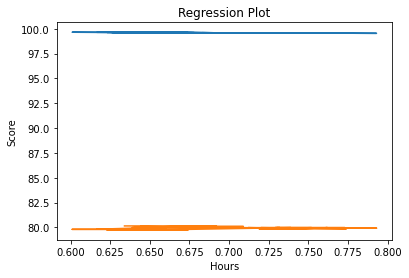

In [64]:
plt.plot(d.iloc[:, 1].values,p)
plt.title('Regression Plot')  
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.show()

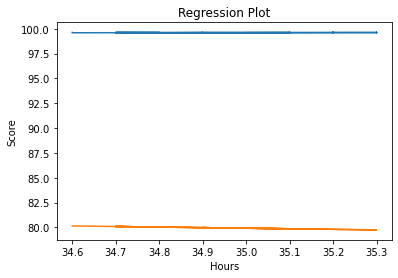

In [65]:
plt.plot(d.iloc[:, 2].values,p)
plt.title('Regression Plot')  
plt.xlabel('Hours')  
plt.ylabel('Score') 
plt.show()